In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightkurve import search_targetpixelfile
from altaipony.lcio import from_TargetPixel_source
import pickle

In [3]:
%matplotlib inline

In [4]:
EPIC = 219426848
C = 7
flc = from_TargetPixel_source(EPIC)

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/K2/ktwo219426848-c07_lc/ktwo219426848-c07_lpd-targ.fits.gz with expected size 7804972.
265 cadences will be ignored (bitmask=1130799)
265 cadences will be ignored (bitmask=1130799)


In [5]:
flcaperture3sig = flc.detrend(campaign=7,de_niter=10, splits=[2468.5,2515], outlier_sigma=3)#took 10 iterations

Using split values [2468.5, 2515] given from the command line


KeyboardInterrupt: 

In [55]:
pickle.dump(flcaperture, open('data/pony_219426848_7_29_26042019_aperture.p','wb'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='data/pony_219426848_7_29_26042019_aperture.p'>
  """Entry point for launching an IPython kernel.


In [23]:
flcpsf = pickle.load(open( "data/pony_219426848_7_29_26042019_psf_iterative.p", "rb" ))
flcpsf0 = pickle.load(open( "data/pony_96083_7_29_26042019_psf_iterative_flux0.p", "rb" ))
flcaperture = pickle.load(open('data/pony_219426848_7_29_26042019_aperture.p','rb'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='data/pony_219426848_7_29_26042019_psf_iterative.p'>
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='data/pony_96083_7_29_26042019_psf_iterative_flux0.p'>
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='data/pony_219426848_7_29_26042019_aperture.p'>
  This is separate from the ipykernel package so we can avoid doing imports until


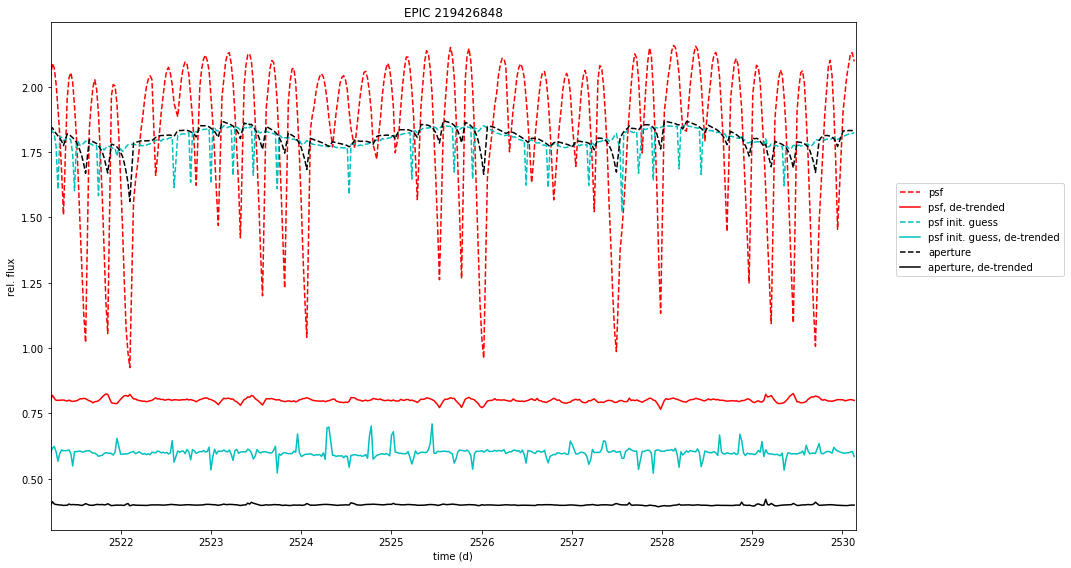

In [40]:
plt.figure(figsize=(15,8))
mi, ma = 2500,2900
plt.plot(flcpsf.time[mi:ma],flcpsf.flux[mi:ma]/np.median(flcpsf.flux)+0.8,c='r',linestyle='dashed',
        label='psf')
plt.plot(flcpsf.time[mi:ma],flcpsf.detrended_flux[mi:ma]/np.median(flcpsf.detrended_flux)-.2,c='r',
        label='psf, de-trended')
plt.plot(flcpsf0.time,flcpsf0.flux/np.median(flcpsf0.flux)+0.8,c='c',linestyle='dashed',
        label='psf init. guess')
plt.plot(flcpsf0.time,flcpsf0.detrended_flux/np.median(flcpsf0.detrended_flux)-.4,c='c',
        label='psf init. guess, de-trended')
plt.plot(flcaperture.time[mi:ma],flcaperture.flux[mi:ma]/np.median(flcaperture.flux)+.8, c='k',linestyle='dashed',
        label='aperture')
plt.plot(flcaperture.time[mi:ma],flcaperture.detrended_flux[mi:ma]/np.median(flcaperture.detrended_flux)-.6, c='k',
        label='aperture, de-trended')
plt.xlim(flcpsf.time[mi],flcpsf.time[ma])
plt.legend(loc=(1.05,.5))
plt.xlabel('time (d)')
plt.ylabel('rel. flux')
plt.title('EPIC 219426848')
plt.tight_layout()
plt.savefig('plots/iterative_psf_epic_219426848.png',dpi=300)

In [13]:
flcaperture.flux[mi:ma].std(), flcpsf.flux[mi:ma].std()

(9483.529, 357521.66174252593)

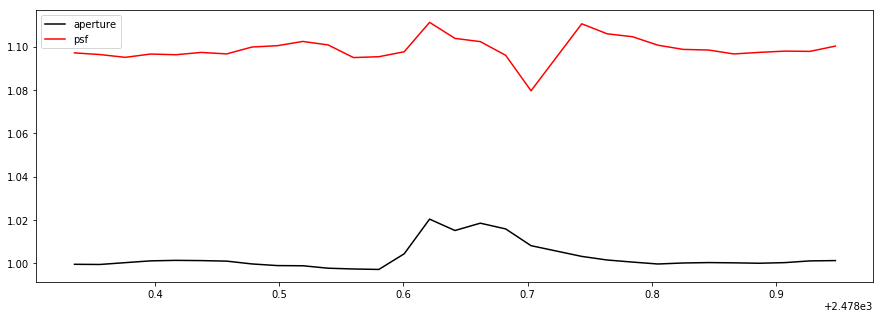

In [104]:
plt.figure(figsize=(15,5))
mi, ma = 320,350
mi, ma =500, 530
plt.plot(flcaperture.time[mi:ma],flcaperture.detrended_flux[mi:ma]/np.median(flcaperture.detrended_flux), c='k',
        label='aperture')
plt.plot(flcpsf.time[mi:ma],flcpsf.detrended_flux[mi:ma]/np.median(flcpsf.detrended_flux)+0.1,c='r',
        label='psf')
#plt.ylim(.95,1.25)
plt.legend()

In [105]:
flcpsf.find_flares().flares

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
0,0.031130,115424,115427,143.123659,443.995519,9,12,2467.465013,2467.526310
1,0.031244,117554,117560,286.377837,335.505970,2040,2045,2510.985030,2511.107620
2,0.037922,117660,117668,413.907606,382.443018,2141,2148,2513.150780,2513.314233
3,0.032279,117746,117752,309.354040,342.308492,2221,2226,2514.907898,2515.030487


In [106]:
flcpsf.find_flares().flares

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
0,0.031130,115424,115427,143.123659,443.995519,9,12,2467.465013,2467.526310
1,0.031244,117554,117560,286.377837,335.505970,2040,2045,2510.985030,2511.107620
2,0.037922,117660,117668,413.907606,382.443018,2141,2148,2513.150780,2513.314233
3,0.032279,117746,117752,309.354040,342.308492,2221,2226,2514.907898,2515.030487


In [107]:
from altaipony.flarelc import FlareLightCurve
keys = flcaperture[100:].__dict__
keys.pop('corr_flux')
keys.pop('tr_time')
keys.pop('pv')
keys.pop('keplerid')
keys.pop('tr_position')
keys['centroid_col'] =keys['centroid_col'][100:]
keys['centroid_row'] =keys['centroid_row'][100:]
keys['quality'] =keys['quality'][100:]
keys['cadenceno'] =keys['cadenceno'][100:]
flcsearch  = FlareLightCurve(**keys)
flcsearch.find_flares().flares

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
0,0.024932,115534,115549,503.427916,0.728410,9,23,2469.712573,2470.019058
1,0.037793,115778,115781,123.270512,0.285875,235,238,2474.698047,2474.759343
2,0.020480,115970,115974,124.092651,0.365090,414,418,2478.621022,2478.702750


{'cadenceno': array([115414, 115415, 115416, ..., 119453, 119454, 119456], dtype=int32),
 'campaign': 7,
 'centroid_col': array([255.16854908, 255.16045145, 255.15703663, ..., 254.42596175,
        254.32782385, 254.94437996]),
 'centroid_row': array([987.95553157, 987.97867077, 988.06949952, ..., 989.190147  ,
        989.12976284, 989.51545867]),
 'channel': 29,
 'corr_flux': array([81076.34566597, 80806.57076363, 80064.93502144, ...,
        94838.67961261, 94879.04413074, 95468.32257138]),
 'data_header': XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
 BITPIX  =                    8 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                 2932 / length of first array dimension                
 NAXIS2  =                 4043 / length of second array dimension               
 PCOUNT  =                    0 / group parameter count (not used)          

In [71]:
if size%2==1:
    fitshape = size-2
elif size%2==0:
    fitshape = size-1    

1